#### 데이터프레임 통계

In [41]:
# 테스트 libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mp
mp.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False

In [2]:
# 테스트 데이터
data = {'eng' :[10,30,50,70],
        'kor' :[20,40,60,80],
        'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'])
display(df)

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [6]:
# 행 별 max
df.max(axis=0)

eng     70
kor     80
math    90
dtype: int64

In [5]:
# 열 별 max
df.max(axis=1)

a    90
b    50
c    60
d    80
dtype: int64

In [7]:
# 가장 큰 값
df.max().max()

90

In [11]:
# 1차원으로 변경( Series )
display(df.unstack())
print("\nmax: ",df.unstack().max())

eng   a    10
      b    30
      c    50
      d    70
kor   a    20
      b    40
      c    60
      d    80
math  a    90
      b    50
      c    20
      d    70
dtype: int64


max:  90


In [13]:
# 컬럼별 총계
df.sum(axis=0)

eng     160
kor     200
math    230
dtype: int64

In [14]:
df.sum(axis=1)

a    120
b    120
c    130
d    220
dtype: int64

In [15]:
# 평균값
df.mean()

eng     40.0
kor     50.0
math    57.5
dtype: float64

In [16]:
# 중앙값
df.median()

eng     40.0
kor     50.0
math    60.0
dtype: float64

In [17]:
# 표준편차
df.std()

eng     25.819889
kor     25.819889
math    29.860788
dtype: float64

In [18]:
# 비율
df.quantile([0.25, 0.5, 0.75])

,eng,kor,math
0.25,25.0,35.0,42.5
0.50,40.0,50.0,60.0
0.75,55.0,65.0,75.0


In [20]:
# 요약정보
df.describe()

,eng,kor,math
count,4.000000,4.000000,4.000000
mean,40.000000,50.000000,57.500000
std,25.819889,25.819889,29.860788
min,10.000000,20.000000,20.000000
25%,25.000000,35.000000,42.500000
50%,40.000000,50.000000,60.000000
75%,55.000000,65.000000,75.000000
max,70.000000,80.000000,90.000000


In [19]:
# 카운트
df.count()

eng     4
kor     4
math    4
dtype: int64

In [44]:
# 엑셀저장
!pip install -U openpyxl
df.index.name = '이름'
df.to_excel('data/14.xlsx')

Defaulting to user installation because normal site-packages is not writeable


In [28]:
def fn(v):
    return v.sum()
df.apply(fn, axis=0) # 1차원으로 넘어간다

eng     160
kor     200
math    230
dtype: int64

In [29]:
df.apply( lambda v: v.sum() )

eng     160
kor     200
math    230
dtype: int64

In [36]:
# 국어, 영어, 수학 점수의 평균이 70점 이상이면 합격 아니면 불합력
# Series로 구하시오.
def fn(v):
    # print(v)
    if v.mean() >= 70:
        return '합격'
    else:
        return '불합격'
df.apply(fn, axis=1)

a    불합격
b    불합격
c    불합격
d     합격
dtype: object

In [37]:
df['결과'] = df.apply( lambda v: '합격' if v.mean()>=70 else '불합격', axis=1 )
df

,eng,kor,math,결과
a,10,20,90,불합격
b,30,40,50,불합격
c,50,60,20,불합격
d,70,80,70,합격


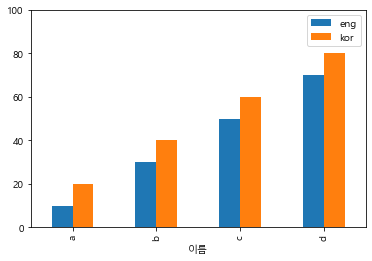

In [47]:
df.plot(kind='bar', y=['eng','kor'], ylim=(0,100))
plt.show()